#### Circulation Data and Analytics

This Notebook contains circulation data and analytics. It also contains plots comparing circulation to other metrics

In [2]:
# necessary imports

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')

In [3]:
#Reading in Data Files -- commented out code would replace NaN values with 0

allBranchMetrics = pd.read_csv('../../data/clean/branch_metrics.csv')
#allBranchMetrics['COMPUTER_SESSIONS_2'] = allBranchMetrics['COMPUTER_SESSIONS'].fillna(0)
#allBranchMetrics['VISITORS_2'] = allBranchMetrics['VISITORS'].fillna(0)
openBranchMetrics = allBranchMetrics[(allBranchMetrics['VISITORS'] > 0) & (allBranchMetrics['COMPUTER_SESSIONS'] > 0)]
#openBranchMetrics['COMPUTER_SESSIONS_2'] = openBranchMetrics['COMPUTER_SESSIONS'].fillna(0)
#openBranchMetrics['VISITORS_2'] = openBranchMetrics['VISITORS'].fillna(0)

The following cell enerates a Line Graph of Average Library Metrics for all CPL for 2011-2023 in terms of Circulation, Visitors, and Computer Usage. 

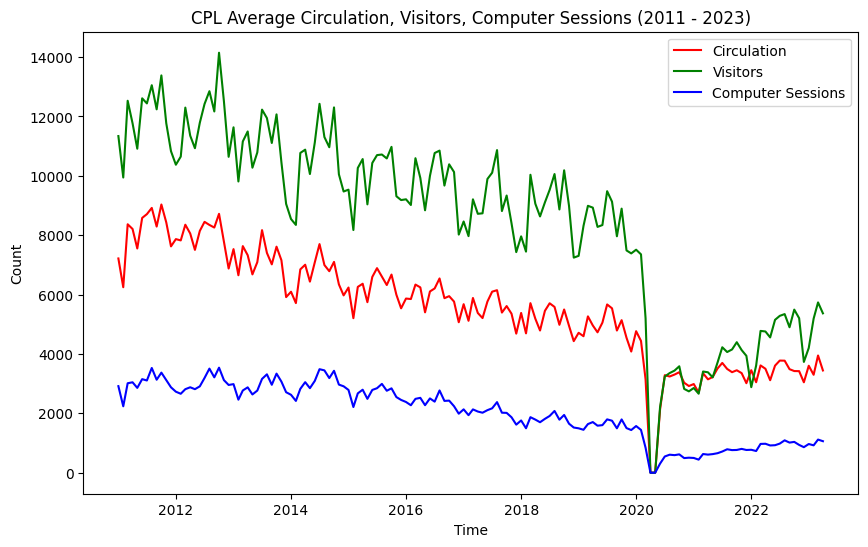

In [13]:
# Convert the 'YEAR' and 'MONTH' columns to a datetime format
allBranchMetrics['DATE'] = pd.to_datetime(allBranchMetrics[['YEAR', 'MONTH']].assign(DAY=1))

# Group the data by 'DATE' and calculate the mean number of circulation
monthlyCirculation = allBranchMetrics.groupby('DATE')['CIRCULATION'].mean()
monthlyVisitors = allBranchMetrics.groupby('DATE')['VISITORS'].mean()
monthlyComputerUsage = allBranchMetrics.groupby('DATE')['COMPUTER_SESSIONS'].mean()

# Plot the monthly visitor patterns
plt.figure(figsize=(10,6)) 
plt.plot(monthlyCirculation, color = 'red')
plt.plot(monthlyVisitors, color = 'green')
plt.plot(monthlyComputerUsage, color = 'blue')
plt.legend(['Circulation', 'Visitors', 'Computer Sessions'])
plt.title('CPL Average Circulation, Visitors, Computer Sessions (2011 - 2023)')
plt.ylabel('Count')
plt.xlabel('Time')
plt.show()

From 2011 to 2019, there has been a downward trend in all metrics. In 2020, there is an obvious spike down (due to COVID-19 related closures). From mid 2020 onwards, there is an upward trend as people begin visiting libraries again but the covery has been very slow. This is likely reflective of the general downward trend in library usage even before quarantine. 

The following cell generates a scatterplot of Circulation vs Visitors per Library per Year to search for correlation.

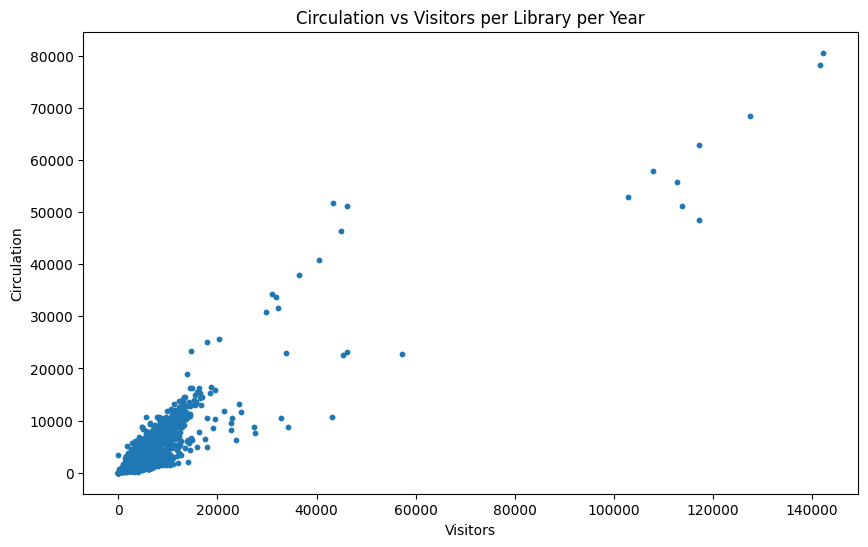

In [20]:
plt.figure(figsize=(10,6)) 
yearlyCirvPerVis = allBranchMetrics.groupby(['BRANCH','YEAR']).mean()
scatter = plt.scatter(x=yearlyCirvPerVis['VISITORS'], y=yearlyCirvPerVis['CIRCULATION'],s=10)
plt.title('Circulation vs Visitors per Library per Year')
plt.xlabel('Visitors')                                 
plt.ylabel('Circulation')   
plt.show()

There appears to be a moderate correlation between Visitors and Circulation. However, because of the extreme outliers, it is difficult to get an idea of the strength of the correlation for the main cluster of data points. 

The following cell generates a scatterplot of Circulation vs Visitors per Library per Year to search for correlation but without top 4 libraries in terms of most visitors (outliers)

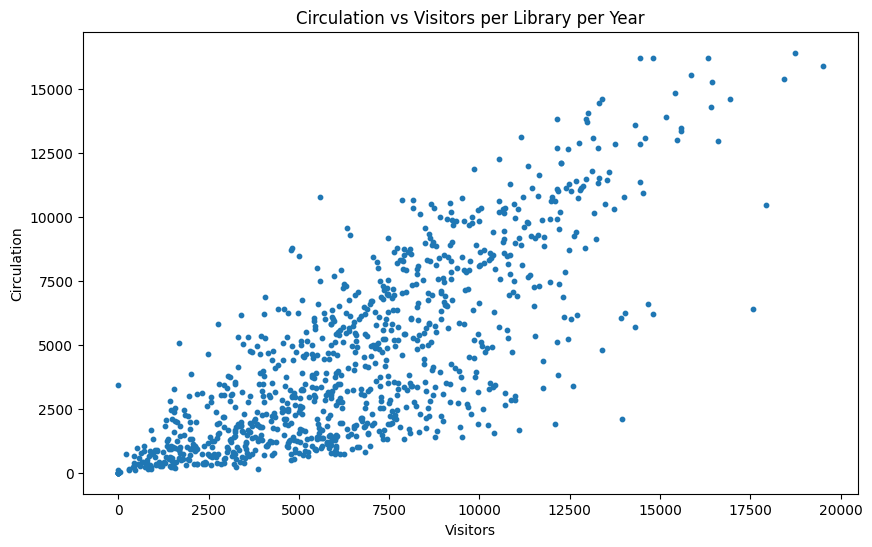

In [23]:
yearlyCirvPerVisNoOutliers = branch_metrics.groupby(['BRANCH','YEAR'])[['CIRCULATION','VISITORS']].mean().reset_index()
yearlyCirvPerVisNoOutliers = yearlyCirvPerVisNoOutliers.loc[yearlyCirvPerVisNoOutliers['BRANCH'] != 'Harold Washington Library Center'] # most visitors and circ
yearlyCirvPerVisNoOutliers = yearlyCirvPerVisNoOutliers.loc[yearlyCirvPerVisNoOutliers['BRANCH'] != 'Sulzer Regional'] # 2nd most visitors and circ
yearlyCirvPerVisNoOutliers = yearlyCirvPerVisNoOutliers.loc[yearlyCirvPerVisNoOutliers['BRANCH'] != 'Woodson Regional'] # next most visitors
yearlyCirvPerVisNoOutliers = yearlyCirvPerVisNoOutliers.loc[yearlyCirvPerVisNoOutliers['BRANCH'] != 'Chinatown'] # next most visitors

plt.figure(figsize=(10,6)) 
scatter = plt.scatter(x=yearlyCirvPerVisNoOutliers['VISITORS'], y=yearlyCirvPerVisNoOutliers['CIRCULATION'],s=10)
plt.title('Circulation vs Visitors per Library per Year')
plt.xlabel('Visitors')                                 
plt.ylabel('Circulation')   
plt.show()

There still appears to be a correlation between Visitors and Circulation but the individual data points are more visible. This scatterplot will be more useful for running a Linear Regression.

In [24]:
yearlyCirvPerVisNoOutliers_no_NaN = yearlyCirvPerVisNoOutliers.dropna()

model = LinearRegression()
model.fit(yearlyCirvPerVisNoOutliers_no_NaN['VISITORS'].to_numpy().reshape((-1, 1)), yearlyCirvPerVisNoOutliers_no_NaN['CIRCULATION'].to_numpy())
r_sq = model.score(yearlyCirvPerVisNoOutliers_no_NaN['VISITORS'].to_numpy().reshape((-1, 1)), yearlyCirvPerVisNoOutliers_no_NaN['CIRCULATION'].to_numpy())
print("coefficient of determination", r_sq)
print("intercept:", model.intercept_)
print("slope", model.coef_)

coefficient of determination 0.620745842034558
intercept: -600.020731686217
slope [0.77100006]


A coefficient of determination (above) indicates a moderately strong association between Visitors and Circulation.

/tmp/ipykernel_910072/3188382329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openBranchMetrics['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))
/tmp/ipykernel_910072/3188382329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openBranchMetrics['CIRC PER VISITOR'] = openBranchMetrics['CIRCULATION']/openBranchMetrics['VISITORS']


(0.0, 2.0)

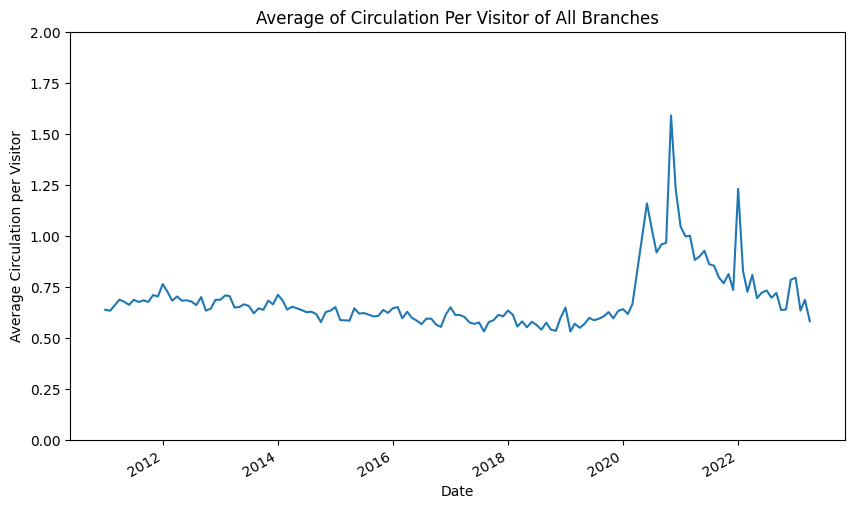

In [26]:
openBranchMetrics['DATE'] = pd.to_datetime(branch_metrics_nonzero[['YEAR', 'MONTH']].assign(DAY=1))
openBranchMetrics['CIRC PER VISITOR'] = openBranchMetrics['CIRCULATION']/openBranchMetrics['VISITORS']
    
# Group the data by 'DATE' and calculate the mean number of circulation
monthlyCircPerVisitor = openBranchMetrics.groupby('DATE')['CIRC PER VISITOR'].mean()

monthlyCircPerVisitor.plot(figsize=(10, 6), xlabel='Date', ylabel='Average Circulation per Visitor', title ='Average of Circulation Per Visitor of All Branches')
plt.ylim([0, 2])

Circulation per Visitor appears fairly stable from 2011 up until 2020. In 2020, there is a spike, likely due to libraries closing for visitors but still having methods to check out books. It is also important to consider that starting 2022, circulation included downloadble materials as well. That may explain why 2022 circulation per visitor is higher on average compared to pre-pandemic times. Specifically, people may be downloading materials through ebook platforms such as Libby but not visiting physical libraries. 

Circulation per Visitor in 2022 seems similar to pre-pandemic patterns so this line graph compares circulation in 2017 and 2022. The goal is to understand whether circulation per visitor is even because 2022 circulation evened out or because visitors and circulation both dropped enough for the ratio to be consistent with 2017. 

/tmp/ipykernel_910072/1070081718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circulationYears.drop(columns = 'BRANCH', inplace = True)


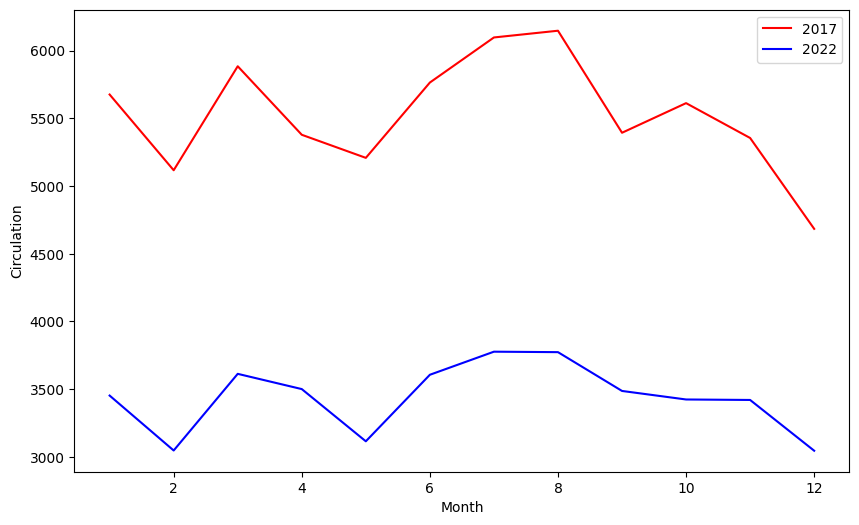

In [38]:
circulationYears = allBranchMetrics.loc[(allBranchMetrics['YEAR']==2017)|(allBranchMetrics['YEAR']==2022)]
circulationYears.drop(columns = 'BRANCH', inplace = True)

circulation2017 = circulationYears.loc[(circulationYears['YEAR']==2017)]
circulation2022 = circulationYears.loc[(circulationYears['YEAR']==2022)]
circulation2017 = circulation2017.groupby(['MONTH'])[['CIRCULATION']].mean()
circulation2022 = circulation2022.groupby(['MONTH'])[['CIRCULATION']].mean()

plt.figure(figsize=(10,6)) 
plt.plot(circulation2017, color = 'red')
plt.plot(circulation2022, color = 'blue')
plt.legend(['2017', '2022'])
plt.ylabel('Circulation')
plt.xlabel('Month')
plt.show()

It appears that circulation was signigicantly lower in 2022 compared to 2017, nearly half, which means the similar circulation per visitor ratios may be due to the decreased visitor count as well. 

The following graph compares circulation per visitor in 2017 to 2022 to look for patterns. 

/tmp/ipykernel_910072/178135457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circulationYears2.drop(columns = 'BRANCH', inplace = True)
/tmp/ipykernel_910072/178135457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circulationYears2['CIRC PER VISITOR'] = circulationYears['CIRCULATION']/circulationYears['VISITORS']


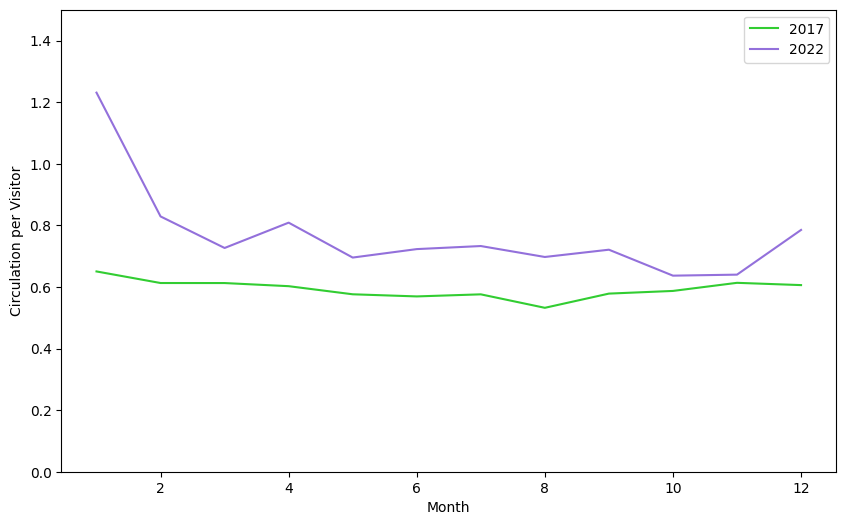

In [39]:
circulationYears2 = openBranchMetrics.loc[(openBranchMetrics['YEAR']==2017)|(openBranchMetrics['YEAR']==2022)]
circulationYears2.drop(columns = 'BRANCH', inplace = True)
circulationYears2['CIRC PER VISITOR'] = circulationYears['CIRCULATION']/circulationYears['VISITORS']

circPerVis2017 = circulationYears2.loc[(circulationYears2['YEAR']==2017)]
circPerVis2022 = circulationYears2.loc[(circulationYears2['YEAR']==2022)]
circPerVis2017 = circPerVis2017.groupby(['MONTH'])[['CIRC PER VISITOR']].mean()
circPerVis2022 = circPerVis2022.groupby(['MONTH'])[['CIRC PER VISITOR']].mean()

plt.figure(figsize=(10,6)) 
plt.plot(circPerVis2017, color = 'limegreen')
plt.plot(circPerVis2022, color = 'mediumpurple')
plt.legend(['2017', '2022'])
plt.ylabel('Circulation per Visitor')
plt.xlabel('Month')
plt.ylim([0, 1.5])
plt.show()

Circulation per visitor still seems to be higher in 2022 than 2017 - especially in January and February. In the next graph, we will plot Circulation and Visitors separately in 2017 and 2022 respectively to understand the pattern further.

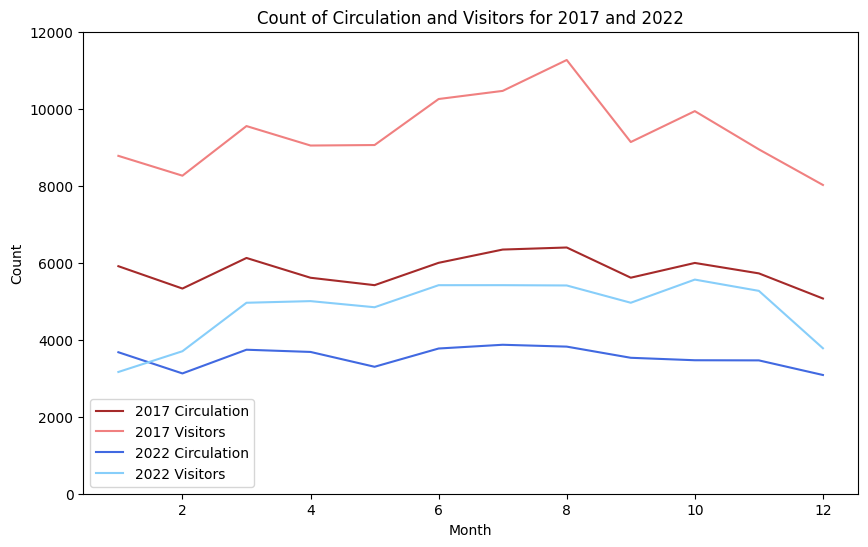

In [40]:
data2017 = circulationYears2.loc[(circulationYears2['YEAR']==2017)]
data2022 = circulationYears2.loc[(circulationYears2['YEAR']==2022)]
circ2017 = data2017.groupby(['MONTH'])[['CIRCULATION']].mean()
circ2022 = data2022.groupby(['MONTH'])[['CIRCULATION']].mean()
vis2017 = data2017.groupby(['MONTH'])[['VISITORS']].mean()
vis2022 = data2022.groupby(['MONTH'])[['VISITORS']].mean()

plt.figure(figsize=(10,6)) 
plt.plot(circ2017, color = 'brown')
plt.plot(vis2017, color = 'lightcoral')
plt.plot(circ2022, color = 'royalblue')
plt.plot(vis2022, color = 'lightskyblue')
plt.legend(['2017 Circulation', '2017 Visitors', '2022 Circulation','2022 Visitors'])
plt.ylim([0, 12000])
plt.ylabel('Count')
plt.xlabel('Month')
plt.title('Count of Circulation and Visitors for 2017 and 2022')
plt.show()

From this graph, we can see that what looked like a major spike in the beginning of 2022 was simply the single instance of circulation exceeding visitors. While this is intersting, it is not as significant as we excepted. 

Ignore the following cell for now: work in progress

In [44]:
sortedBranchMetrics = allBranchMetrics[['BRANCH','VISITORS']]
sortedBranchMetrics = sortedBranchMetrics.groupby('BRANCH').sum()
#sortedBranchMetrics = sortedBranchMetrics.sort_values(by = 'VISITORS')
sortedBranchMetrics = sortedBranchMetrics.reset_index()
sortedBranchMetrics = sortedBranchMetrics.loc[sortedBranchMetrics['BRANCH'] != 'Roosevelt']

sizes = []
for lib in sortedBranchMetrics.index:
    if(sortedBranchMetrics['VISITORS'][lib] >= 800000):
        sizes.append("Large")
    elif(sortedBranchMetrics['VISITORS'][lib]>=400000 and sortedBranchMetrics['VISITORS'][lib] < 800000):
        sizes.append("Medium")
    elif(sortedBranchMetrics['VISITORS'][lib]>=0 and sortedBranchMetrics['VISITORS'][lib] < 400000):
        sizes.append("Small")
    else:
        sizes.append("")
#print(sizes)
#sortedBranchMetrics.BRANCH.unique()

The following cell generates a bar plot comparing the percent drop in visitors from 2022 to 2019

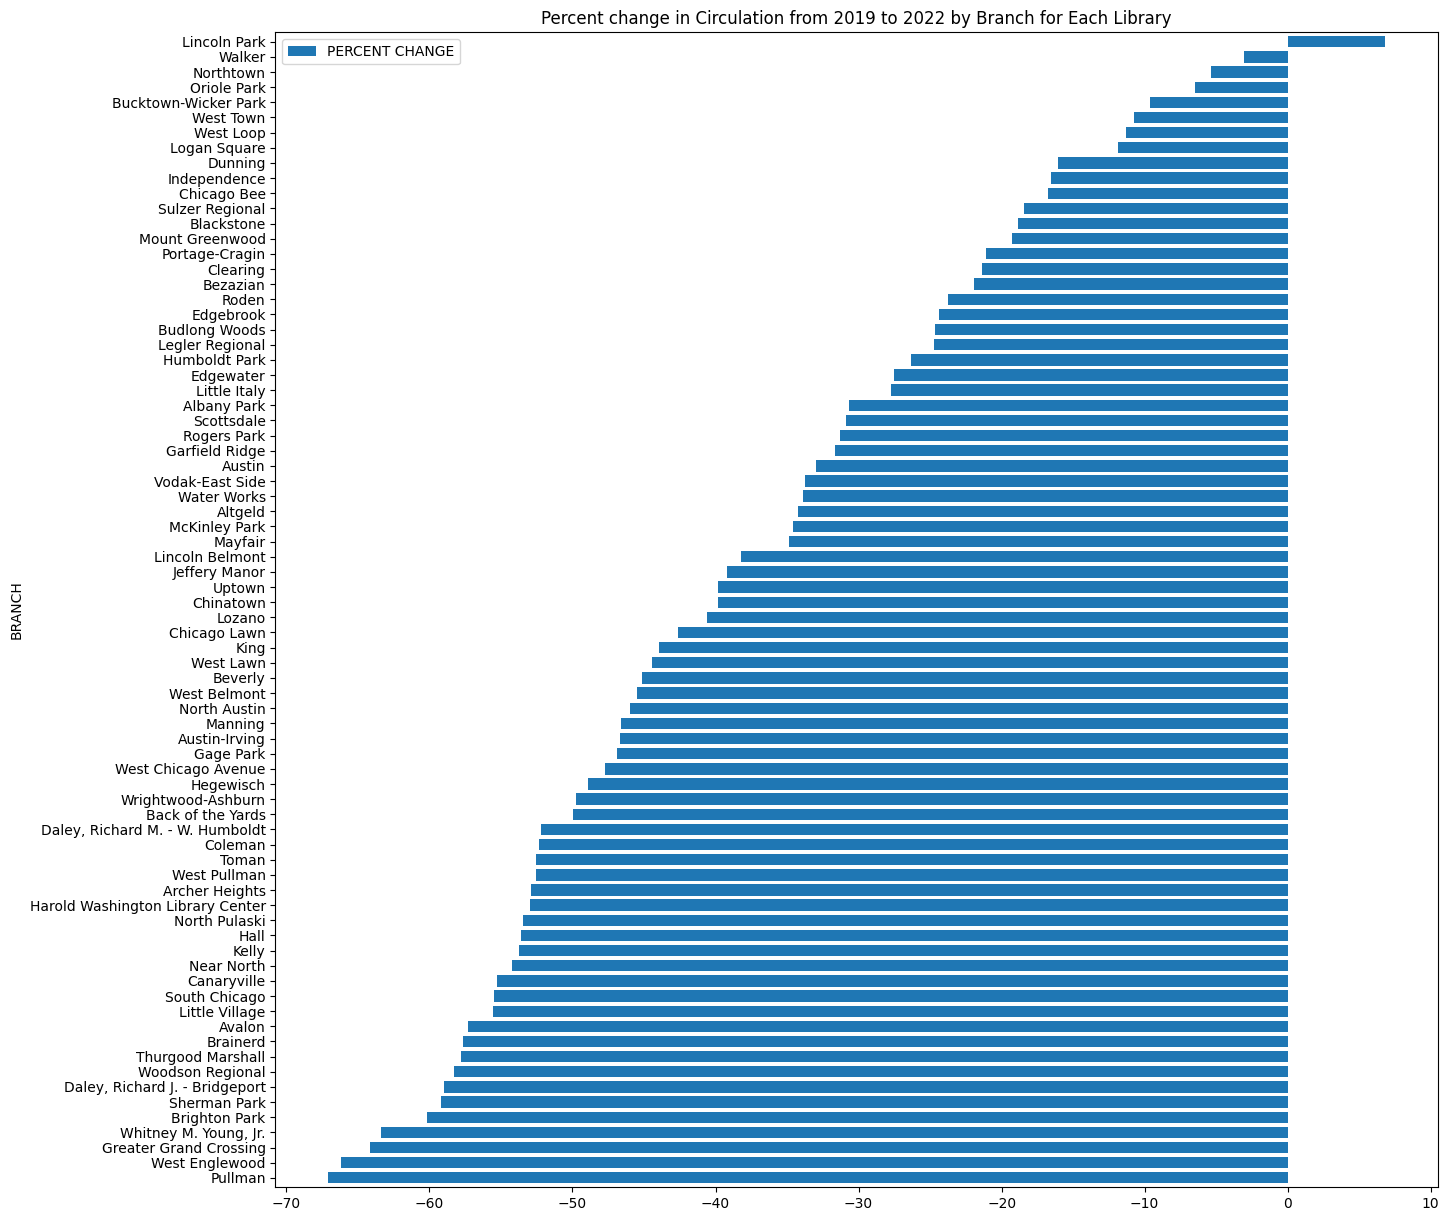

In [4]:
circ19And22 = allBranchMetrics.loc[(allBranchMetrics['YEAR']==2019)|(allBranchMetrics['YEAR']==2022)]
circ19And22 = circ19And22.groupby(['BRANCH', 'YEAR'])[['CIRCULATION', 'VISITORS']].mean().unstack()
circ19And22['PERCENT CHANGE'] = ((circ19And22['CIRCULATION'][2022]-circ19And22['CIRCULATION'][2019])/circ19And22['CIRCULATION'][2019])*100
circ19And22.head(5)
circPercentChange19And22 = circ19And22[['PERCENT CHANGE']].reset_index()
#circ_percent_change_19_22['SIZE'] = sizes
#print(circ_percent_change_19_22.shape)

# this function removes outliers that appear because the library was closed in 2019 (there is a significant jump in 2022 because
# of the 2019 closure)
circPercentChange19And22 = circPercentChange19And22.loc[circPercentChange19And22['BRANCH'] != 'Merlo'] # closed all of 2019
circPercentChange19And22 = circPercentChange19And22.loc[circPercentChange19And22['BRANCH'] != 'Jefferson Park'] # closed a lot of 2019
circPercentChange19And22 = circPercentChange19And22.loc[circPercentChange19And22['BRANCH'] != 'South Shore'] # closed a lot of 2019
circPercentChange19And22 = circPercentChange19And22.loc[circPercentChange19And22['BRANCH'] != 'Douglass'] # closed a lot of 2019
circPercentChange19And22 = circPercentChange19And22.loc[circPercentChange19And22['BRANCH'] != 'Galewood-Mont Clare'] # temporarily closed 2020 onwards

circPercentChange19And22.sort_values('PERCENT CHANGE', inplace = True)
circPercentChange19And22.head(5)
circPercentChange19And22.plot(x = 'BRANCH', y = 'PERCENT CHANGE', kind = 'barh', width = .75, figsize=(15,15), title = "Percent change in Circulation from 2019 to 2022 by Branch for Each Library") 


#ignore the following commented out code

#circ_percent_change_small = circ_percent_change_19_22.loc[circ_percent_change_19_22['SIZE'] != 'Small']
#circ_percent_change_med = circ_percent_change_19_22.loc[circ_percent_change_19_22['SIZE'] != 'Medium']
#circ_percent_change_large = circ_percent_change_19_22.loc[circ_percent_change_19_22['SIZE'] != 'Large']


#circ_percent_change_small.plot(x = 'BRANCH', y = 'PERCENT CHANGE', kind = 'barh', width = .75, figsize=(15,15), title = "Percent change in Circulation from 2019 to 2022 by Branch for Small Libraries") 
#circ_percent_change_med.plot(x = 'BRANCH', y = 'PERCENT CHANGE', kind = 'barh', width = .75, figsize=(15,15), title = "Percent change in Circulation from 2019 to 2022 by Branch for Medium Libraries") 
#circ_percent_change_large.plot(x = 'BRANCH', y = 'PERCENT CHANGE', kind = 'barh', width = .75, figsize=(15,15), title = "Percent change in Circulation from 2019 to 2022 by Branch for Large Libraries") 

plt.show()

It is interesting to see that the largest library -- Harold Washington Library Center -- experienced one of the greatest drops from 2019 to 2022. The second largest library -- Sulzer Regional -- saw a much smaller drop. I am interested in organizing this plot by library size and making a scatterplot to see if there is a correlation between library size and change in circulation. If that does not provide an explanation, I will examine the relationship with other metrics. 